In [19]:
#libraries
import numpy as np
import pandas as pd
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
plotly.tools.set_credentials_file(username='chimp234', api_key='VVATkoZA5g0Xh1eCAv3l')
print(__version__) # requires version >= 1.9.0
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import os, json, requests, pickle
import warnings
import cufflinks as cf
warnings.filterwarnings('ignore')

2.6.0


# 🚙

# Data Analysis & Visualization of Uber Vienna from 7/3/2016 to 7/30/2016

For this capstone project i will be analyzing some Uber Vienna call data from [Uber Movement Vienna](https://www.uber.com/en-ID/cities/vienna/) in March 2016. 
____
This Uber analytical assessment is modeled after real-world challenges that the company faces. Read the following terms, and get a feel for how they relate to each other in the context of Uber’s business model. 
* **“Supply”** — The number of available Uber cars on the road.
* **“Demand”** — The number of users looking for a ride at any given time.
* **“Request”** — The number of people who have requested an Uber car within the app.
* **“Accept”** — The number of requests that were accepted by drivers
* **“Cancellation”** — an accept that is cancelled by the user before it is completed. Usually users can cancel requests for free within a certain period of time (often 5 minutes) after making them; afterwards, users are charged a nominal fee.
* **“Completed requests”** — The number of requests that were fulfilled (i.e., resulted in a completed ride). If not given, “completed requests” are usually equal to “accepts” minus “cancellations”.
* **“Eyes”** or **“eyeballs”** — The number of people who opened the Uber app within a given period of time.
    * If a single person opens the app twice within the given period of time, he or she is still only counted as one eyeball.
    * Eyeballs are not equal to requests. Remember, requests means the number of users looking for a ride; whereas eyeballs means the number of people who have opened the app.
* **“Zeroes”** — People who opened the Uber app but could not call a car because there were no available drivers within range.
    * A ‘zero’ usually occurs when demand exceeds supply within a given market.
    * With supply constant, as demand rises, more zeroes are likely to occur.
    * Zeroes are bad for Uber, because they mean lost revenue.
    * Whenever there is demand for an Uber car that the company is not able to fulfill, it means money lost.
* **“Utilization”** — A general metric that measures what percentage of driver time is being effectively utilized within Uber’s marketplace. Utilization can be measured a number of different ways, and you may be asked about the most effective way to measure it on your test.
    * One potentially useful metric to measure utilization is “driver time spent driving” divided by “total driver time”. This metric helps Uber measure whether drivers are spending a significant amount of time sitting around waiting for jobs. If they are, it’s poor driver experience — and it represents potentially lost profits for Uber.
* **“Fares”** — The total dollar value of fares paid to Uber by riders within a given period of time.
    * Remember, fares are not equal to Uber’s profit, since Uber has to pay its drivers a percentage of fares.
* **“Surge pricing”** — dynamic pricing that rises when demand is significantly greater than supply.
    * Surge pricing is used to make Uber (and drivers) more money during times in which many people want to call a car (i.e. there is significant demand).
    * Usually, surge pricing is activated when demand starts to exceed supply.
* **“Accept rate”** — The percentage of rides (i.e. driving jobs) offered to a given driver that the driver accepted.
* **“Rating”** — The average of all star ratings assigned to a driver by the users who have ridden with that driver; or, the average of all star ratings assigned to a user by the drivers who have served that user.
____
In this analysis, some notion of statistics and hypothesis test are used but are very easy to follow. This [handbook of statistics](http://www.biostathandbook.com/index.html) can be used as a reference to explain basics.


## Warm up


____
***Let's first download the dataset and print out the its size***

In [2]:
# Download the Uberpractice - March 2016 dataset
if os.path.exists('Uberpractice.csv'): # Check if the dataset is present on local disk and load it
    uber = pd.read_csv('Uberpractice.csv',sep = ',')
else: # Download dataset if not available on disk
    url = "https://movement.uber.com/?lang=en-US"
    uber = pd.read_csv(url)
    data.to_csv(url.split('/')[-1])

# Print the size of the dataset
print ("Number of rows / How many records are included in the dataset? :", uber.shape[0])
print ("Number of columns: ", uber.shape[1])

Number of rows / How many records are included in the dataset? : 672
Number of columns:  17


____
** Check the head of uber **

In [31]:
uber.head(2)

,New Date,Weekday,Time/Hours,Eyes,Drivers,Zeroes,Requests,Completed
0,7/3/16,1,0,105,28,23,54,52
1,7/3/16,1,1,98,27,19,54,49


____
** Selection and Indexing **

In [4]:
# Pass a list of NEW column names
uber = uber[['New Date','Weekday','Time/Hours','Eyes','Drivers', 'Zeroes','Requests','Completed',]]

# Print the size of the dataset
print ("Number of rows / How many records are included in the dataset? :", uber.shape[0])
print ("Number of columns: ", uber.shape[1])

Number of rows / How many records are included in the dataset? : 672
Number of columns:  8


____
** Check the NEW head of uber **

In [5]:
uber.head(2)

,New Date,Weekday,Time/Hours,Eyes,Drivers,Zeroes,Requests,Completed
0,7/3/16,1,0,105,28,23,54,52
1,7/3/16,1,1,98,27,19,54,49


____
** Check the info() of the uber **

In [6]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 8 columns):
New Date      672 non-null object
Weekday       672 non-null int64
Time/Hours    672 non-null int64
Eyes          672 non-null int64
Drivers       672 non-null int64
Zeroes        672 non-null int64
Requests      672 non-null int64
Completed     672 non-null int64
dtypes: int64(7), object(1)
memory usage: 42.1+ KB


____
**What is the average Eyes, Zeroes, Completed, Drivers, Requests of Uber ?**

In [7]:
uber[['Eyes','Zeroes','Completed','Drivers','Requests']].mean()

Eyes         163.382440
Zeroes        33.471726
Completed     80.791667
Drivers       49.465774
Requests      86.108631
dtype: float64

____
** What are the maximum Eyes, Zeroes, Completed, Drivers, Requests of Uber in March 2016 ? **

In [8]:
uber[['Eyes','Zeroes','Completed','Drivers','Requests']].max()

Eyes         420
Zeroes       101
Completed    234
Drivers      143
Requests     248
dtype: int64

____
** Now i create a groupby object called byHour, where i group the DataFrame by the date column and use the count() method for aggregation. Using the head() method on this returned DataFrame. **

In [9]:
byHour = uber.groupby('New Date').sum()
byHour.head()

,Weekday,Time/Hours,Eyes,Drivers,Zeroes,Requests,Completed
New Date,,,,,,,
7/10/16,24,276,3715,1096,701,1987,1872
7/11/16,48,276,3980,1209,794,2103,1963
7/12/16,72,276,3949,1210,825,2110,1983
7/13/16,96,276,3622,1144,771,1926,1825
7/14/16,120,276,3877,1166,793,2005,1880


____
** Now i create a simple plot off of the dataframe indicating the count of eyes, zeroes, completed, drivers, requests per date. **

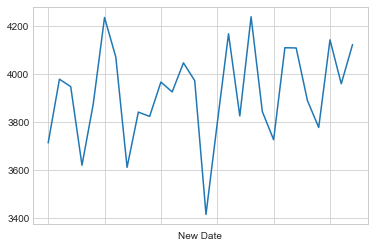

In [10]:
# Eyes
byHour['Eyes'].plot()

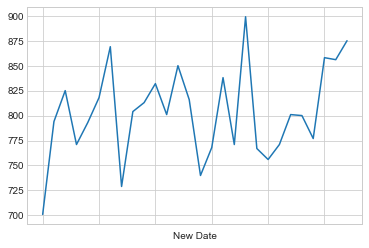

In [11]:
# Zeroes
byHour['Zeroes'].plot()

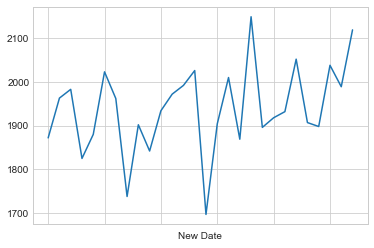

In [12]:
# Completed
byHour['Completed'].plot()

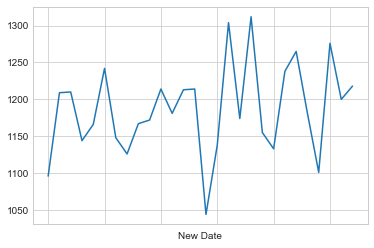

In [13]:
# Drivers
byHour['Drivers'].plot()

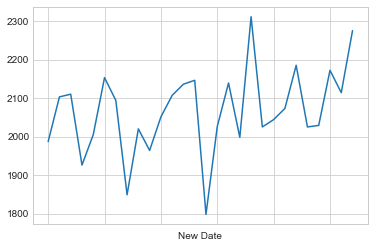

In [14]:
# Requests
byHour['Requests'].plot()

## Spread

In [15]:
uberData = uber[['Eyes','Zeroes','Completed','Drivers','Requests']] 

In [20]:
uberData.iplot(kind='spread')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~chimp234/0 or inside your plot.ly account where it is named 'Plotly Playground 2018-06-11 20:48:59'


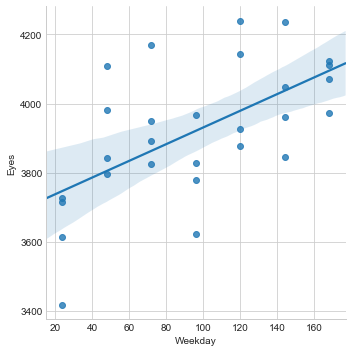

In [17]:
sns.lmplot(x='Weekday',y='Eyes',data=byHour.reset_index())

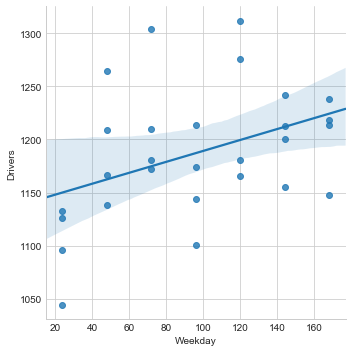

In [18]:
sns.lmplot(x='Weekday',y='Drivers',data=byHour.reset_index())

** Distribution for uberData **

In [21]:
uberData.scatter_matrix()

In [22]:
uberData.iplot(kind='hist',bins=25)

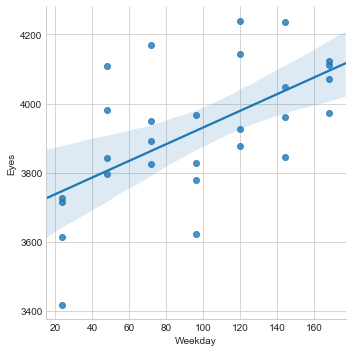

In [20]:
sns.lmplot(x='Weekday',y='Eyes',data=byHour.reset_index())

____
** Now i create a groupby object called byDay, where i group the DataFrame by the day column and use the count() method for aggregation. Using the head() method on this returned DataFrame. **

In [ ]:
byDay = uber.groupby('Time/Hours').sum()
byDay.head()

____
** Now i create a simple plot off of the dataframe indicating the count of Tap-in per Day. **

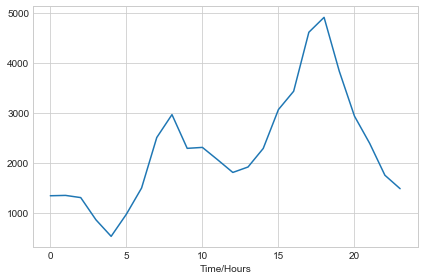

In [21]:
# Could be any column
uber.groupby('Time/Hours').sum()['Completed'].plot()
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our busway data. I'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Coridors(Koridor). There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions**

In [24]:
dayRequests = uber.groupby(by=['New Date','Time/Hours']).sum()['Requests'].unstack()
dayRequests.head()

Time/Hours,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
New Date,,,,,,,,,,,,,,,,,,,,,
7/10/16,44,74,63,31,21,27,26,71,80,46,...,110,90,171,196,173,166,114,69,38,55
7/11/16,66,51,26,32,17,34,45,101,105,114,...,89,100,122,120,223,138,150,108,80,61
7/12/16,56,48,33,25,21,41,47,89,119,77,...,114,96,174,150,240,149,105,95,60,63
7/13/16,62,49,38,29,16,48,52,80,94,104,...,66,83,105,236,126,182,90,70,52,61
7/14/16,49,47,42,37,25,33,47,93,103,77,...,70,99,101,171,189,157,122,77,98,65


____
** Now create a HeatMap using this new DataFrame. **

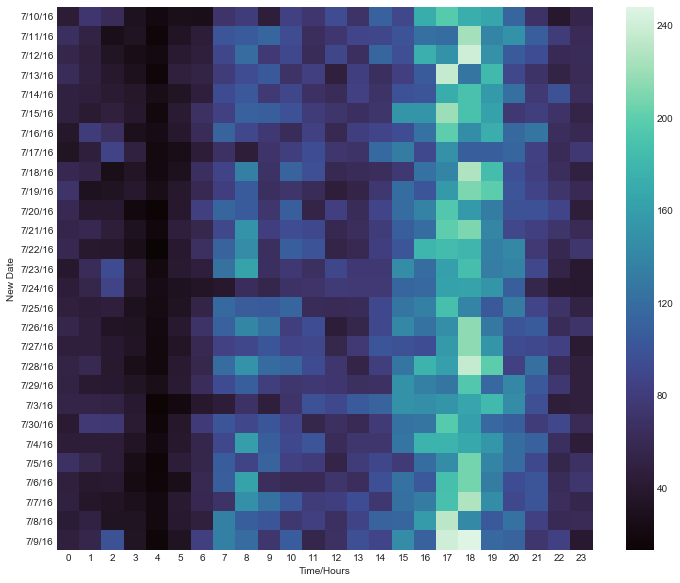

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(dayRequests,cmap='mako')

____
** Now create a clustermap using this DataFrame. **

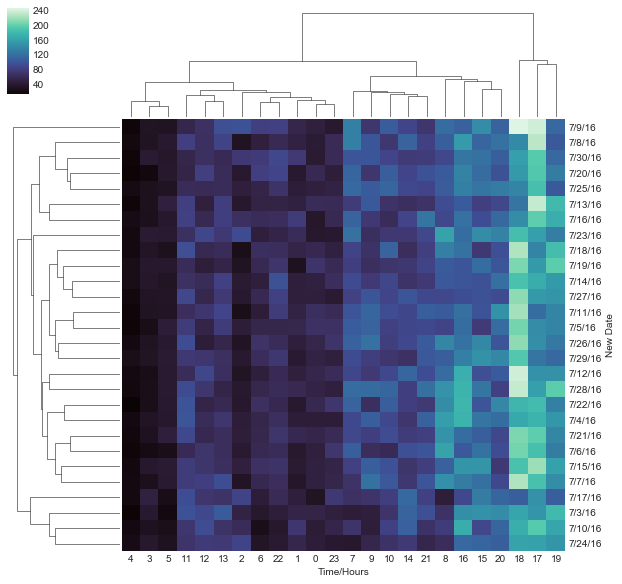

In [26]:
sns.clustermap(dayRequests,cmap='mako')

____
** Now repeat these same plots and operations, for a DataFrame that shows the day as the column. **

In [27]:
dayDriver = uber.groupby(by=['New Date','Time/Hours']).sum()['Drivers'].unstack()
dayDriver.head()

Time/Hours,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
New Date,,,,,,,,,,,,,,,,,,,,,
7/10/16,28,42,44,18,10,15,19,38,49,26,...,61,45,89,91,75,90,74,49,27,34
7/11/16,30,31,19,23,10,16,30,68,80,53,...,56,42,63,73,122,98,71,61,48,30
7/12/16,29,32,17,14,12,29,35,62,67,47,...,59,49,86,97,143,73,68,55,32,31
7/13/16,38,28,22,18,9,27,29,45,52,52,...,32,51,74,117,98,118,53,40,40,41
7/14/16,26,26,21,19,15,17,31,59,54,45,...,40,57,72,97,131,87,63,47,51,32


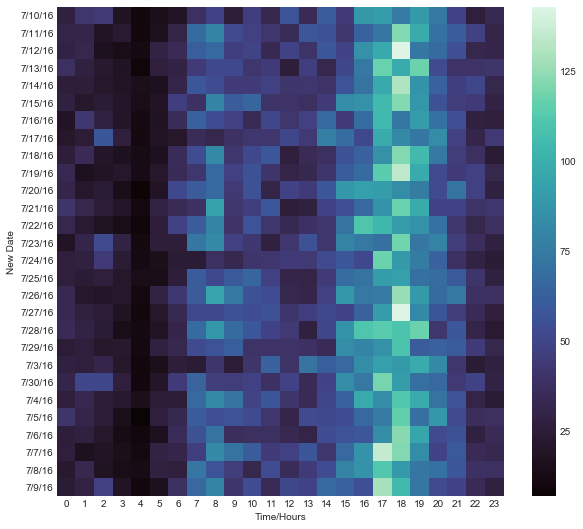

In [28]:
plt.figure(figsize=(10,9))
sns.heatmap(dayDriver,cmap='mako')

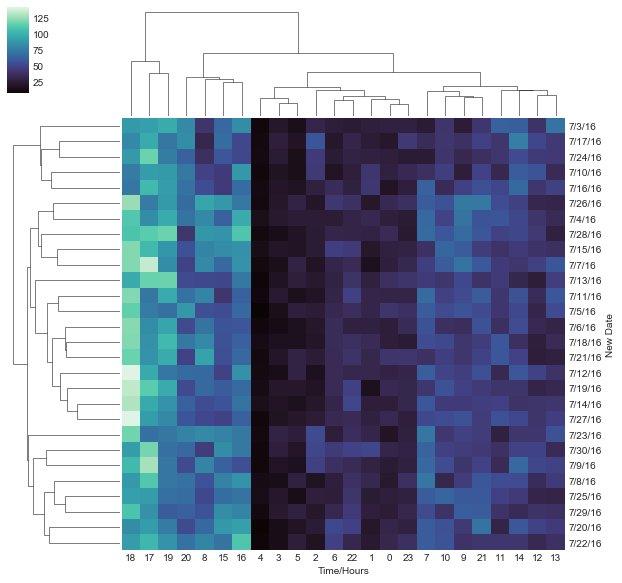

In [29]:
sns.clustermap(dayDriver,cmap='mako')

**Continue exploring the Data however you see fit!**
# Great Job!
____